<a href="https://colab.research.google.com/github/e3la/cleaning-data-checkpoint/blob/main/checkpoint-three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url1 = 'https://raw.githubusercontent.com/e3la/eda-checkpoint/starter-main/articles.csv'
url2 = 'https://raw.githubusercontent.com/e3la/eda-checkpoint/starter-main/umsl-scholarship.csv'

df1= pd.read_csv(url1) #this is the faculty provided dataset
df2= pd.read_csv(url2) #this is the scopus provided dataset

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

To illustrate the missing data in my two datasets I used seaborn to create a column heatmap.

After finding that some columns were completely empty (for df1 these were likely boxes on a form no faculty ended up filling out), I performed *df#.dropna(axis=1, how='all', inplace=True)* to drop those empty columns, and reran the sns heatmap to see the new df#.

Text(95.72222222222221, 0.5, 'Rows')

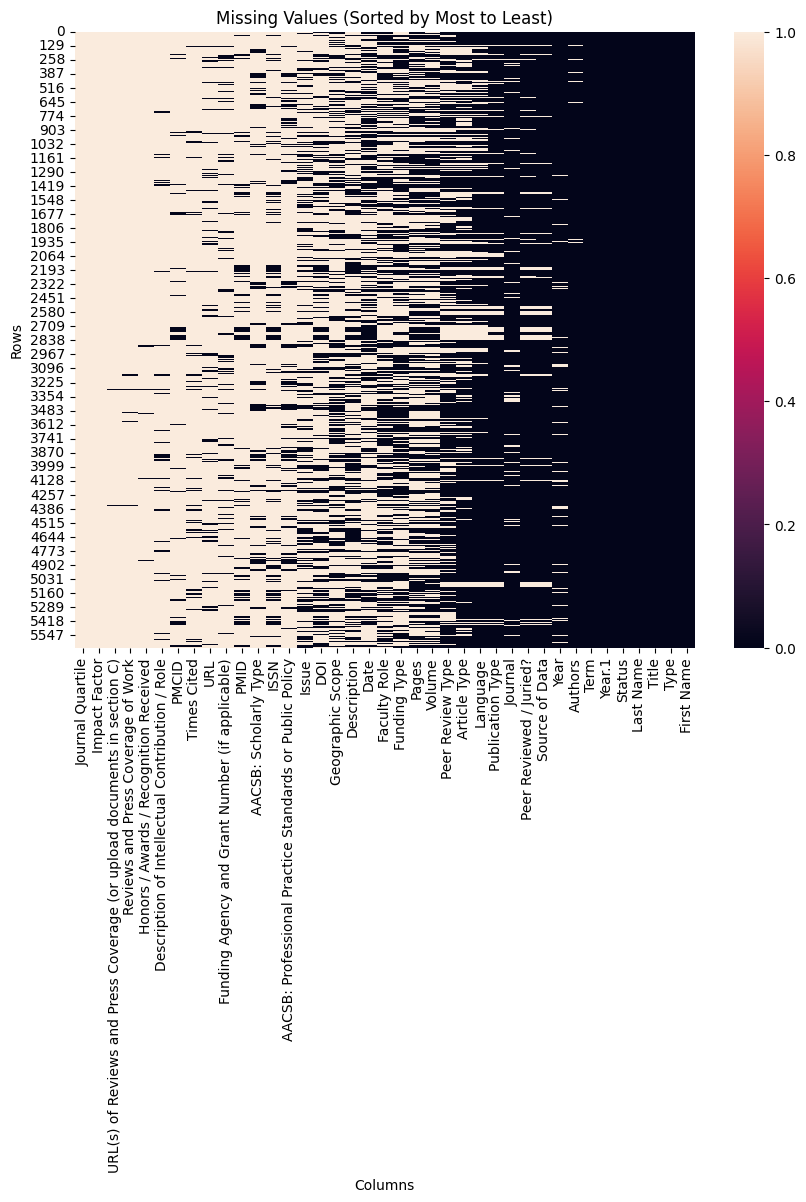

In [22]:
# Count number of missing values per column
missing_vals = df1.isnull().sum()

# Sort values and columns
sorted_cols = missing_vals.sort_values(ascending=False).index

plt.figure(figsize=(10,8))

sns.heatmap(df1[sorted_cols].isnull(),
            xticklabels=sorted_cols)

plt.title('Missing Values (Sorted by Most to Least)')
plt.xlabel('Columns')
plt.ylabel('Rows')

Text(95.72222222222221, 0.5, 'Rows')

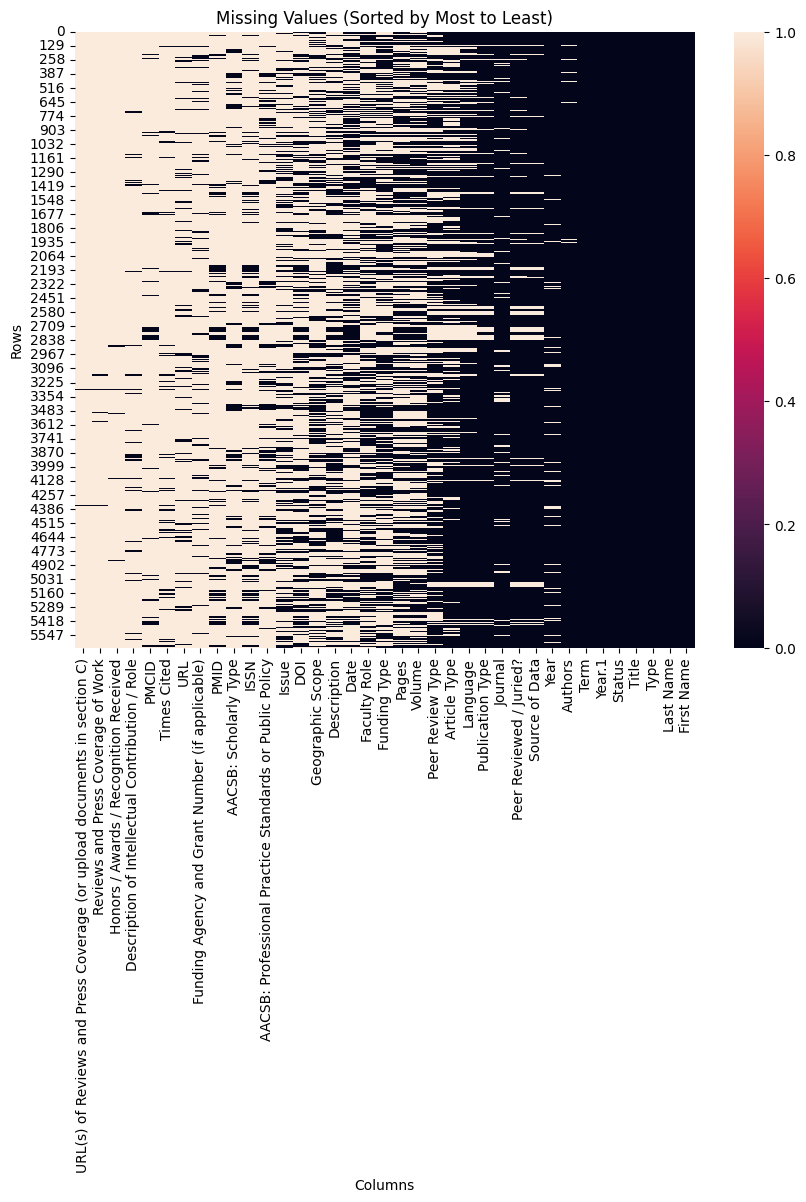

In [23]:
df1.dropna(axis=1, how='all', inplace=True)

# Count number of missing values per column
missing_vals = df1.isnull().sum()

# Sort values and columns
sorted_cols = missing_vals.sort_values(ascending=False).index

plt.figure(figsize=(10,8))

sns.heatmap(df1[sorted_cols].isnull(),
            xticklabels=sorted_cols)

plt.title('Missing Values (Sorted by Most to Least)')
plt.xlabel('Columns')
plt.ylabel('Rows')

Text(95.72222222222221, 0.5, 'Rows')

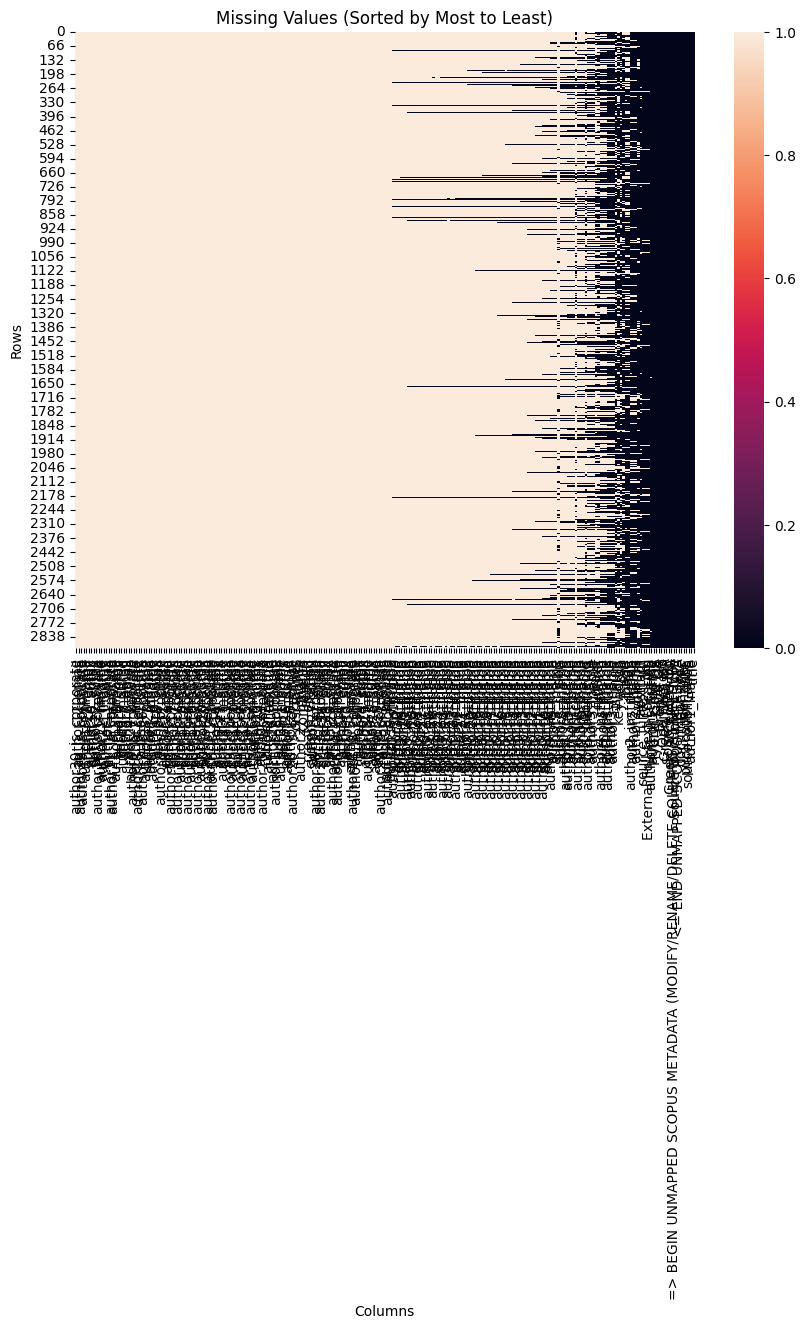

In [24]:
# Count number of missing values per column
missing_vals = df2.isnull().sum()

# Sort values and columns
sorted_cols = missing_vals.sort_values(ascending=False).index

plt.figure(figsize=(10,8))

sns.heatmap(df2[sorted_cols].isnull(),
            xticklabels=sorted_cols)

plt.title('Missing Values (Sorted by Most to Least)')
plt.xlabel('Columns')
plt.ylabel('Rows')

Text(95.72222222222221, 0.5, 'Rows')

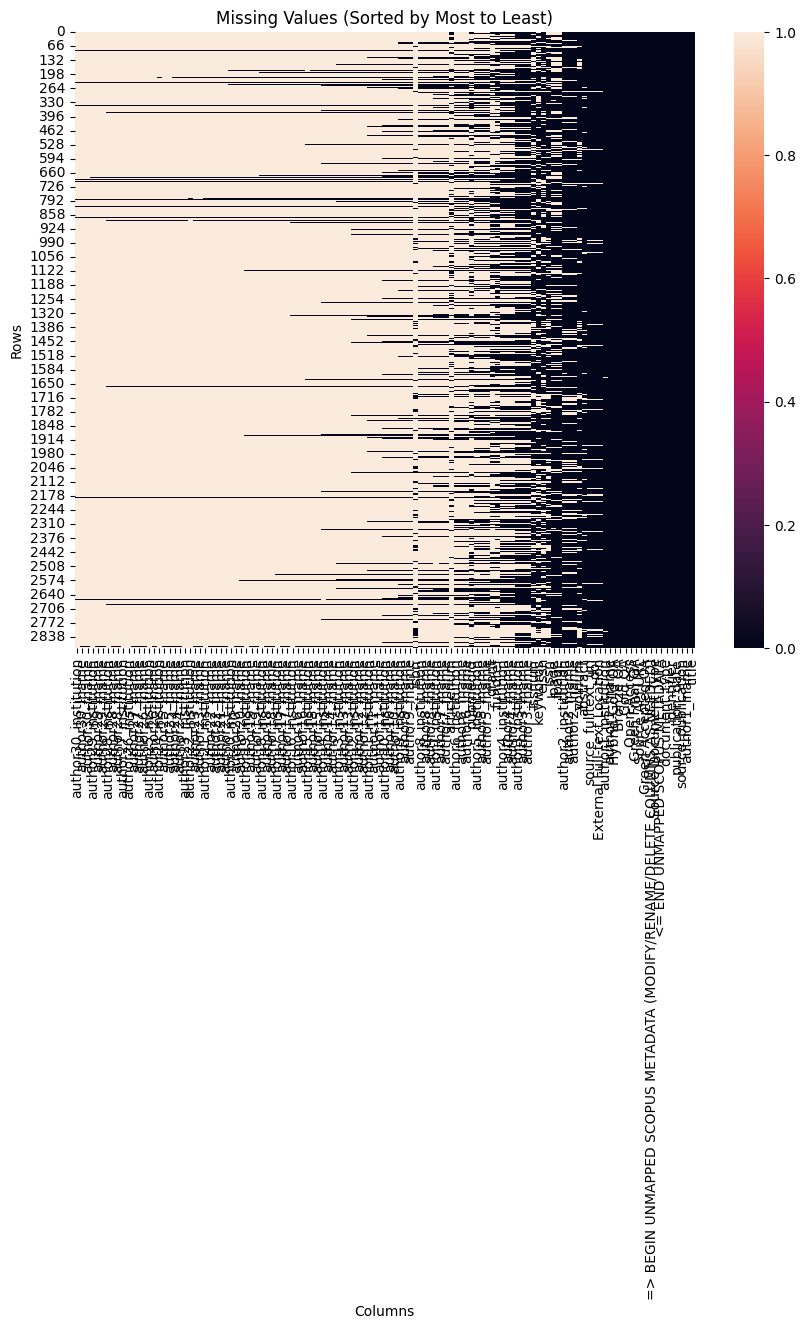

In [25]:
df2.dropna(axis=1, how='all', inplace=True)

# Count number of missing values per column
missing_vals = df2.isnull().sum()

# Sort values and columns
sorted_cols = missing_vals.sort_values(ascending=False).index

plt.figure(figsize=(10,8))

sns.heatmap(df2[sorted_cols].isnull(),
            xticklabels=sorted_cols)

plt.title('Missing Values (Sorted by Most to Least)')
plt.xlabel('Columns')
plt.ylabel('Rows')

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

I used a bar chart as recommended in the third method for identifying outliers from:

> Justin, Lianne &. “Data Cleaning Techniques in Python: The Ultimate Guide.” Just into Data, 3 Jan. 2022, https://www.justintodata.com/data-cleaning-techniques-python-guide/.

This is because the majority of my data is non-numeric. My first dataset was restricted to articles. My second dataset was not. I decided to remove anything that wasn't an article as Irregular Data from the second dataset.


<Axes: >

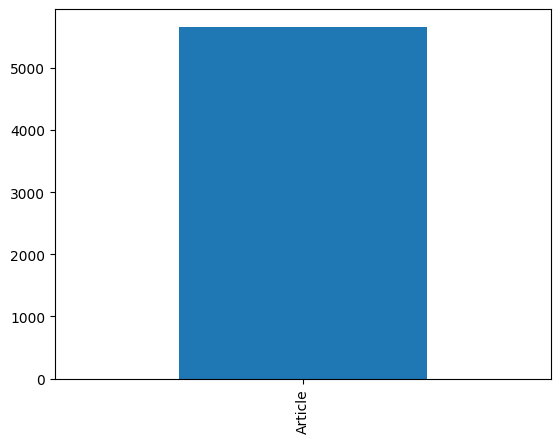

In [26]:
df1['Type'].value_counts().plot(kind='bar')

<Axes: >

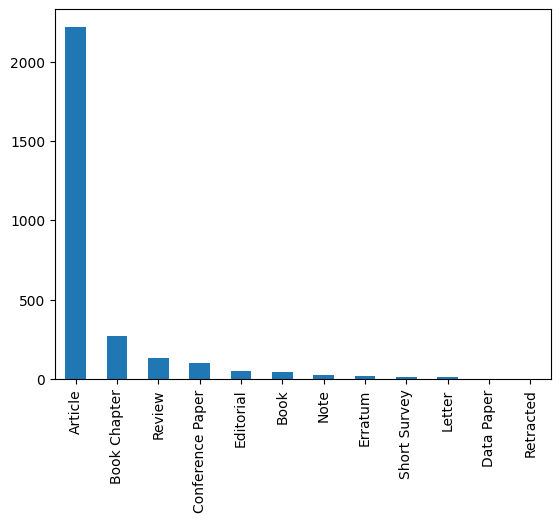

In [27]:
df2['Source Document Type'].value_counts().plot(kind='bar')

<Axes: >

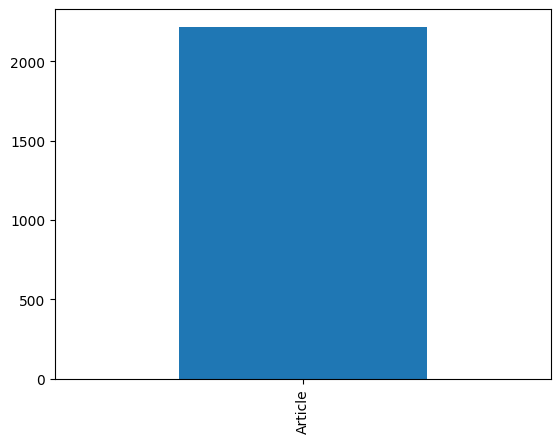

In [28]:
df2 = df2[df2['Source Document Type'] == 'Article']
df2['Source Document Type'].value_counts().plot(kind='bar')

## Unnecessary Data - Duplicates

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

I am motivated to address duplicate data.

> Justin, Lianne &. “Data Cleaning Techniques in Python: The Ultimate Guide.” Just into Data, 3 Jan. 2022, https://www.justintodata.com/data-cleaning-techniques-python-guide/.

My faculty dataset had 12 rows of duplicate data, which I dedupped. My scopus dataset had no duplicate rows.

I also ran an analysis of duplicate DOIs and duplicate Titles but decided to leave those in. In the faculty dataset it is helpful to know which faculty have duplicate titles / dois because you can see which have authored together that way.

In [29]:
df1[df1.duplicated()]


,First Name,Last Name,Type,Title,Journal,Date,Year,Volume,Pages,Issue,...,Publication Type,Faculty Role,Funding Agency and Grant Number (if applicable),Description of Intellectual Contribution / Role,Reviews and Press Coverage of Work,URL(s) of Reviews and Press Coverage (or upload documents in section C),Language,Honors / Awards / Recognition Received,Source of Data,Times Cited
319,J,Rochester,Article,"""Mizzou Madness""",St Louis Jewish Light,12/31/2015,2015.0,NaN,3,NaN,...,Magazine / Periodical,NaN,NaN,NaN,NaN,NaN,English,NaN,Self-reported,NaN
790,Nigam,Rath,Article,Synthesis and Characterization of Luminescent ...,Journal of Organometallic Chemistry,NaN,2016.0,NaN,NaN,NaN,...,Journal-Research / Scholarly / Literary,NaN,NaN,NaN,NaN,NaN,English,NaN,FAS and other legacy systems,NaN
801,Nigam,Rath,Article,Synthesis and Characterization of Luminescent ...,Journal of Organometallic Chemistry,NaN,2016.0,NaN,NaN,NaN,...,Journal-Research / Scholarly / Literary,NaN,NaN,NaN,NaN,NaN,English,NaN,FAS and other legacy systems,NaN
850,Nigam,Rath,Article,Synthesis and Characterization of Luminescent ...,Journal of Organometallic Chemistry,NaN,2016.0,NaN,NaN,NaN,...,Journal-Research / Scholarly / Literary,NaN,NaN,NaN,NaN,NaN,English,NaN,FAS and other legacy systems,NaN
853,Nigam,Rath,Article,Synthesis and Characterization of Luminescent ...,Journal of Organometallic Chemistry,NaN,2016.0,NaN,NaN,NaN,...,Journal-Research / Scholarly / Literary,NaN,NaN,NaN,NaN,NaN,English,NaN,FAS and other legacy systems,NaN
855,Nigam,Rath,Article,Synthesis and Characterization of Luminescent ...,Journal of Organometallic Chemistry,NaN,2016.0,NaN,NaN,NaN,...,Journal-Research / Scholarly / Literary,NaN,NaN,NaN,NaN,NaN,English,NaN,FAS and other legacy systems,NaN
1461,David,Kimball,Article,Making American Elections Great Again: Immigra...,Electoral Studies,4/24/2018,2018.0,NaN,NaN,NaN,...,Journal-Research / Scholarly / Literary,Co-author,UMSL College of Arts and Sciences,NaN,NaN,NaN,English,NaN,Self-reported,NaN
1468,David,Kimball,Article,Immigrant Resentment and Voter Fraud Beliefs i...,American Politics Research,NaN,2017.0,46,402-433,3,...,Journal-Research / Scholarly / Literary,Co-author,NaN,NaN,NaN,NaN,English,NaN,Self-reported,NaN
2004,Shirley,Porterfield,Article,"A Nurse Practitioner Led, Computer Education I...",The Journal for Nurse Practitioners,9/1/2016,2016.0,12,NaN,8,...,Journal-Research / Scholarly / Literary,NaN,NaN,NaN,NaN,NaN,English,NaN,Self-reported,NaN
2144,Lea-Rachel,Kosnik,Article,"The Media, Voter Fraud, and the U.S. 2012 Elec...","Journal of Elections, Public Opinion and Parties",NaN,2020.0,NaN,NaN,NaN,...,Journal-Research / Scholarly / Literary,Co-author,NaN,NaN,NaN,NaN,English,NaN,Self-reported,NaN


In [30]:
df1.drop_duplicates()

,First Name,Last Name,Type,Title,Journal,Date,Year,Volume,Pages,Issue,...,Publication Type,Faculty Role,Funding Agency and Grant Number (if applicable),Description of Intellectual Contribution / Role,Reviews and Press Coverage of Work,URL(s) of Reviews and Press Coverage (or upload documents in section C),Language,Honors / Awards / Recognition Received,Source of Data,Times Cited
0,Michael,Allison,Article,Investigating the Biomedical Workforce,Science and Public Policy,2019,2019.0,46,913-926,6,...,Journal-Research / Scholarly / Literary,Lead / Corresponding author,NIH,NaN,NaN,NaN,English,NaN,Self-reported,NaN
1,Michael,Allison,Article,Investigating the US Biomedical Workforce: Gen...,Science and Public Policy,2019,2019.0,46,913-926,6,...,Journal-Research / Scholarly / Literary,Co-author,NaN,NaN,NaN,NaN,English,NaN,Self-reported,NaN
2,Richard,Cook,Article,"Review of ""The Power of Negative Thinking: Cyn...",Studies in American Culture,NaN,2010.0,October,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FAS and other legacy systems,NaN
3,Richard,Cook,Article,"Review of ""Emerson's Ghosts:Literature, Politi...",Studies in American Culture,NaN,2009.0,NaN,4 ms pages,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FAS and other legacy systems,NaN
4,Francis,Grady,Article,Chaucer's Langland's Boethius,Yearbook of Langland Studies,2018,2018.0,32,271-87,NaN,...,Journal-Research / Scholarly / Literary,Lead / Corresponding author,NaN,NaN,NaN,NaN,English,NaN,Self-reported,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5657,Colleen,Mpofu,Article,The Chap GPT Artificial Intelligence Chatbot: ...,Issues in Accounting Education,NaN,2023.0,NaN,NaN,NaN,...,Journal-Research / Scholarly / Literary,Co-author,NaN,NaN,NaN,NaN,English,NaN,Self-reported,NaN
5658,Colleen,Mpofu,Article,The Chap GPT Artificial Intelligence Chatbot: ...,Issues in Accounting Education,NaN,2023.0,NaN,NaN,NaN,...,Journal-Research / Scholarly / Literary,Co-author,NaN,NaN,NaN,NaN,English,NaN,Self-reported,NaN
5659,Andrea,Giuffre,Article,Understanding Trends in Jail Population in St....,NaN,NaN,2022.0,NaN,NaN,NaN,...,Report,NaN,NaN,NaN,NaN,NaN,English,NaN,Self-reported,NaN
5660,Andrea,Giuffre,Article,"Routine contact with the police: Race, avoidan...",Criminology,NaN,2022.0,NaN,NaN,NaN,...,Journal-Research / Scholarly / Literary,NaN,NaN,NaN,NaN,NaN,English,NaN,Self-reported,NaN


In [31]:
df2[df2.duplicated()]


,title,=> BEGIN UNMAPPED SCOPUS METADATA (MODIFY/RENAME/DELETE COLUMNS AS NEEDED),Open Access,Gold OA,Hybrid Gold OA,Bronze OA,Green Final OA,Green Accepted OA,External Full-text Location,Source API URL,...,author27_institution,author28_fname,author28_lname,author28_institution,author29_fname,author29_lname,author29_institution,author30_fname,author30_lname,author30_institution


In [32]:
df1[df1.drop(columns=['DOI']).duplicated()]

df1_dedupped = df1.drop(columns=['DOI']).drop_duplicates()

print(df1.shape,"Faculty dataset with duplicate DOIs")
print(df1_dedupped.shape,"Faculty dataset without duplicate DOIs")
print("*****")
df2[df2.drop(columns=['doi']).duplicated()]

df2_dedupped = df2.drop(columns=['doi']).drop_duplicates()

print(df2.shape,"Scopus dataset with duplicate DOIs")
print(df2_dedupped.shape,"Scopus dataset without duplicate DOIs")

(5662, 37) Faculty dataset with duplicate DOIs
(5650, 36) Faculty dataset without duplicate DOIs
*****
(2219, 121) Scopus dataset with duplicate DOIs
(2219, 120) Scopus dataset without duplicate DOIs


In [33]:
df1[df1.drop(columns=['Title']).duplicated()]

df1_dedupped = df1.drop(columns=['Title']).drop_duplicates()

print(df1.shape,"Faculty dataset with duplicate titles")
print(df1_dedupped.shape,"Faculty dataset without duplicate titles")
print("*****")
df2[df2.drop(columns=['title']).duplicated()]

df2_dedupped = df2.drop(columns=['title']).drop_duplicates()

print(df2.shape,"Scopus dataset with duplicate titles")
print(df2_dedupped.shape,"Scopus dataset without duplicate titles")

(5662, 37) Faculty dataset with duplicate titles
(5605, 36) Faculty dataset without duplicate titles
*****
(2219, 121) Scopus dataset with duplicate titles
(2219, 120) Scopus dataset without duplicate titles


## Unnecessary Data - Uninformative

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

I am motivated to address uninformative data.

> Justin, Lianne &. “Data Cleaning Techniques in Python: The Ultimate Guide.” Just into Data, 3 Jan. 2022, https://www.justintodata.com/data-cleaning-techniques-python-guide/.

In [34]:
num_rows = len(df1)

for col in df1.columns:
    cnts = df1[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Type: 100.00%
Article    5662
Name: Type, dtype: int64



In [35]:
df1.drop('Type', axis=1, inplace=True)


In [36]:
num_rows = len(df1)

for col in df1.columns:
    cnts = df1[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In [37]:
num_rows = len(df2)

for col in df2.columns:
    cnts = df2[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

=> BEGIN UNMAPPED SCOPUS METADATA (MODIFY/RENAME/DELETE COLUMNS AS NEEDED): 100.00%
     2219
Name: => BEGIN UNMAPPED SCOPUS METADATA (MODIFY/RENAME/DELETE COLUMNS AS NEEDED), dtype: int64

Source Document Type: 100.00%
Article    2219
Name: Source Document Type, dtype: int64

<= END UNMAPPED SCOPUS METADATA: 100.00%
     2219
Name: <= END UNMAPPED SCOPUS METADATA, dtype: int64

document_type: 100.00%
article    2219
Name: document_type, dtype: int64

isbn: 99.91%
NaN              2217
9781788013680       1
9780128171738       1
Name: isbn, dtype: int64



In [38]:
df2.drop('=> BEGIN UNMAPPED SCOPUS METADATA (MODIFY/RENAME/DELETE COLUMNS AS NEEDED)', axis=1, inplace=True)
df2.drop('document_type', axis=1, inplace=True)
df2.drop('<= END UNMAPPED SCOPUS METADATA', axis=1, inplace=True)
df2.drop('Source Document Type', axis=1, inplace=True)
df2.drop('isbn', axis=1, inplace=True)

In [39]:
num_rows = len(df2)

for col in df2.columns:
    cnts = df2[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

Some of the titles are in all caps. It would be better if they were camel_case.

In [43]:
all_caps_titles = df1[df1['Title'].str.isupper()]['Title']
print(all_caps_titles)

#Function to convert text to camel case
def to_camel_case(text):
    words = text.split('_')
    return ''.join([words[0].lower()] + [word.capitalize() for word in words[1:]])

#Apply the function to rows with all caps titles
df1['Title'] = df1['Title'].apply(lambda x: to_camel_case(x) if x.isupper() else x)

#Print the updated DataFrame
print(df1['Title'])

271     ASSESSING THE LONG-TERM IMPACT OF A PROFESSION...
650     "BY HIS OWN HAND?: THE MYSTERIOUS DEATH OF MER...
653     "INDIAN AND EUROPEAN CONTACT IN CONTEXT: THE M...
892                                                #NAME?
1248    DISCUSSION OF CRITICAL INCIDENTS IN TEACHING: ...
1270      PEER DISAGREEMENT AND THE DUNNING-KRUGER EFFECT
1755    LONG PATHS IN THE DISTANCE GRAPH OVER LARGE SU...
1939    MIDTERM REFLECTIONS ON THE ETHEL REED SHOW AT ...
1983    INVESTIGATING THE EFFECT OF POST-RELEASE HOUSI...
2532    SECOND-STAGE TREATMENTS FOR RELATIVE NONRESPON...
2742    REDUCING CSF PARTIAL VOLUME EFFECTS TO ENHANCE...
2745    APPLICATION OF A NOVEL QUANTITATIVE TRACTOGRAP...
3090    TRAFFIC SIGN NAMING AND WRITTEN EXAMINATIONS A...
3097    OLDER ADULTS' HEALTH STATUS PREDICTS STATE DRI...
3098    PASS-FAIL DIFFERENCES IN OLDER DRIVERS RATED C...
3465    THE INFORMATIVENESS OF TRADES AND QUOTES IN TH...
3930    (R) THE IMPACT OF CORPORATE SOCIAL RESPONSIBIL...
4294    MEDICA

In [46]:
all_caps_titles = df2[df2['title'].str.isupper()]['title']
print(all_caps_titles)

#Apply the function to rows with all caps titles
df2['title'] = df2['title'].apply(lambda x: to_camel_case(x) if x.isupper() else x)

#Print the updated DataFrame
print(df2['title'])

280                KNOWLEDGE AS FACTUALLY GROUNDED BELIEF
281     DISCRIMINATION WITHOUT INTOXICATION: THE ROLE ...
513     REFLECTIONS ON BEING A LANGUAGE EDUCATOR IN BR...
978     A NEW AMELIORATIVE APPROACH TO MORAL RESPONSIB...
1017    MACROECONOMIC TRENDS AMONG VISEGRAD COUNTRIES,...
1947    “EXPERIENCE OF THE EXPECTED?” RACE AND ETHNICI...
2015    STUDYING CRIME TRENDS: NORMAL SCIENCE AND EXOG...
2016    A SURVEY OF JEL CODES: WHAT DO THEY MEAN AND A...
2022    TESTING THE TRANSITIVITY OF REPORTED RISK PERC...
2292    EVIDENCE FOR THE EXPANDING ROLE OF CONSULTATIO...
2502    DEVELOPING PARENT-PROFESSIONAL PARTNERSHIPS IN...
2618    INCENTIVES FOR COLLECTIVE DEVIANCE: GROUP SIZE...
2623    SPATIAL DIMENSIONS OF THE EFFECT OF NEIGHBORHO...
2633    CHANGES IN RELIGIOUS ECOLOGY AND SOCIOECONOMIC...
Name: title, dtype: object
0       Association between seroprevalence of measles ...
1       Composition and function of the Galapagos peng...
2       Perceived network bridging influences

## Summarize Your Results

Make note of your answers to the following questions.

1) Did you find all four types of dirty data in your dataset?

* All four types of dirty data were discovered in my two datasets.

2) Did the process of cleaning your data give you new insights into your dataset?

* Yes! I hadn't noticed all the insitutional information hiding in the authors columns in the scopus dataset - that will likely be fruitful to explore.

3) Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

* Through out this assignment I haven't been able to decide if I want to join the two datasets together, and if so, how. I still am not sure. Finding a way to flatten the author information in the scopus dataset is probably a good idea.

* I also want to work on using the openaccessbutton api - as illustrated partially working in the scratch workspace below these answers.

Text(95.72222222222221, 0.5, 'Rows')

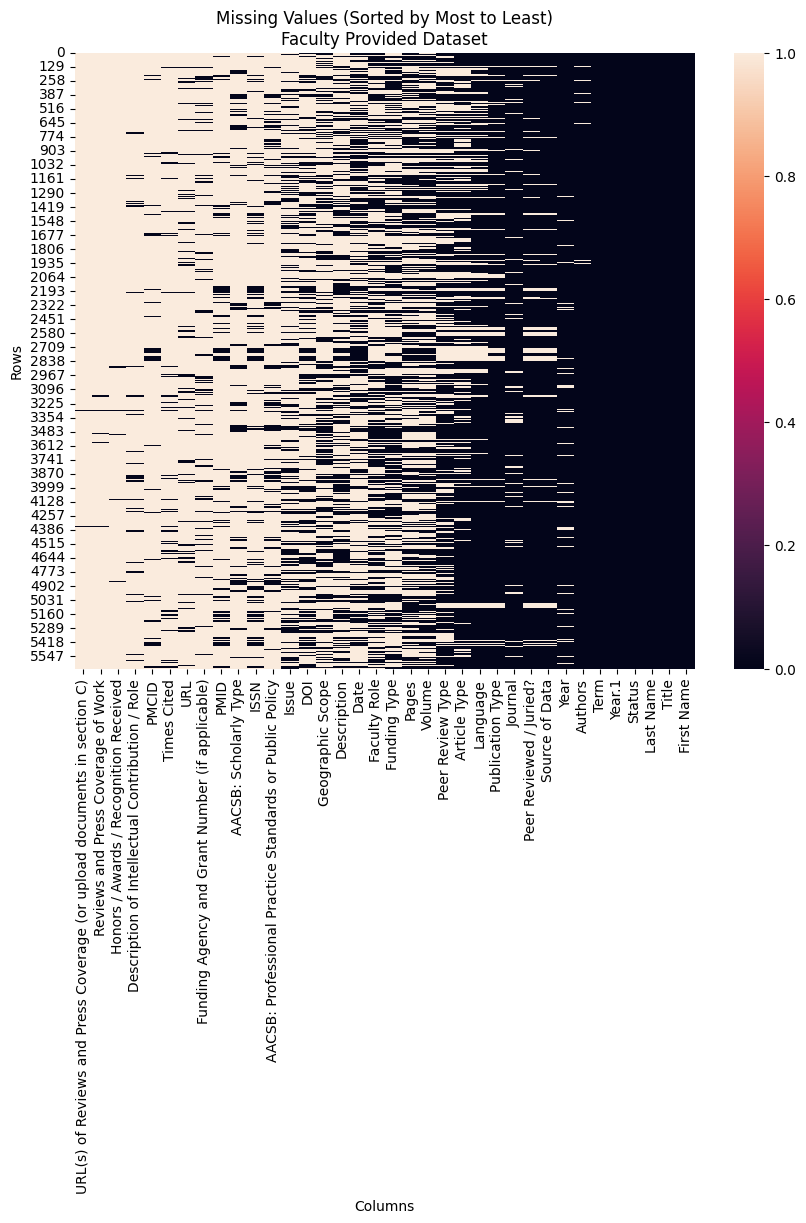

In [58]:
# Count number of missing values per column
missing_vals = df1.isnull().sum()

# Sort values and columns
sorted_cols = missing_vals.sort_values(ascending=False).index

plt.figure(figsize=(10,8))

sns.heatmap(df1[sorted_cols].isnull(),
            xticklabels=sorted_cols)

plt.title('Missing Values (Sorted by Most to Least)\nFaculty Provided Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')

Text(95.72222222222221, 0.5, 'Rows')

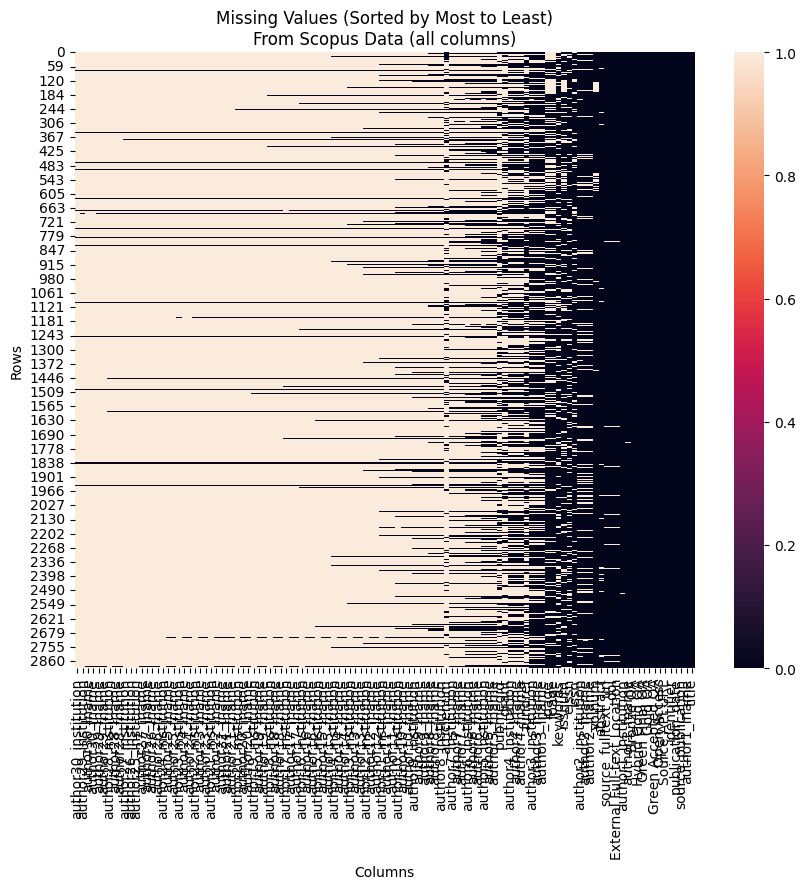

In [57]:
# Count number of missing values per column
missing_vals = df2.isnull().sum()

# Sort values and columns
sorted_cols = missing_vals.sort_values(ascending=False).index

plt.figure(figsize=(10,8))

sns.heatmap(df2[sorted_cols].isnull(),
            xticklabels=sorted_cols)

plt.title('Missing Values (Sorted by Most to Least)\nFrom Scopus Data (all columns)')
plt.xlabel('Columns')
plt.ylabel('Rows')

Text(95.72222222222221, 0.5, 'Rows')

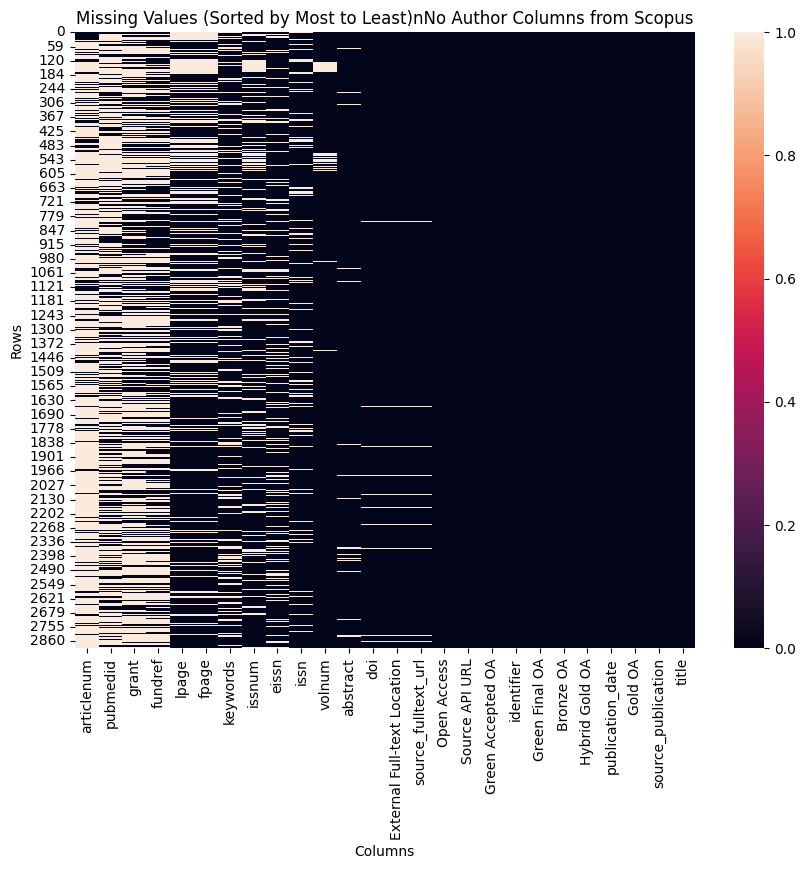

In [55]:
no_author_columns = [column for column in df2.columns if 'author' not in column]
df3 = df2[no_author_columns] #this is the scopus spreadsheet with none of the author columns

# Count number of missing values per column
missing_vals = df3.isnull().sum()

# Sort values and columns
sorted_cols = missing_vals.sort_values(ascending=False).index

plt.figure(figsize=(10,8))

sns.heatmap(df3[sorted_cols].isnull(),
            xticklabels=sorted_cols)

plt.title('Missing Values (Sorted by Most to Least)nNo Author Columns from Scopus')
plt.xlabel('Columns')
plt.ylabel('Rows')

Text(95.72222222222221, 0.5, 'Rows')

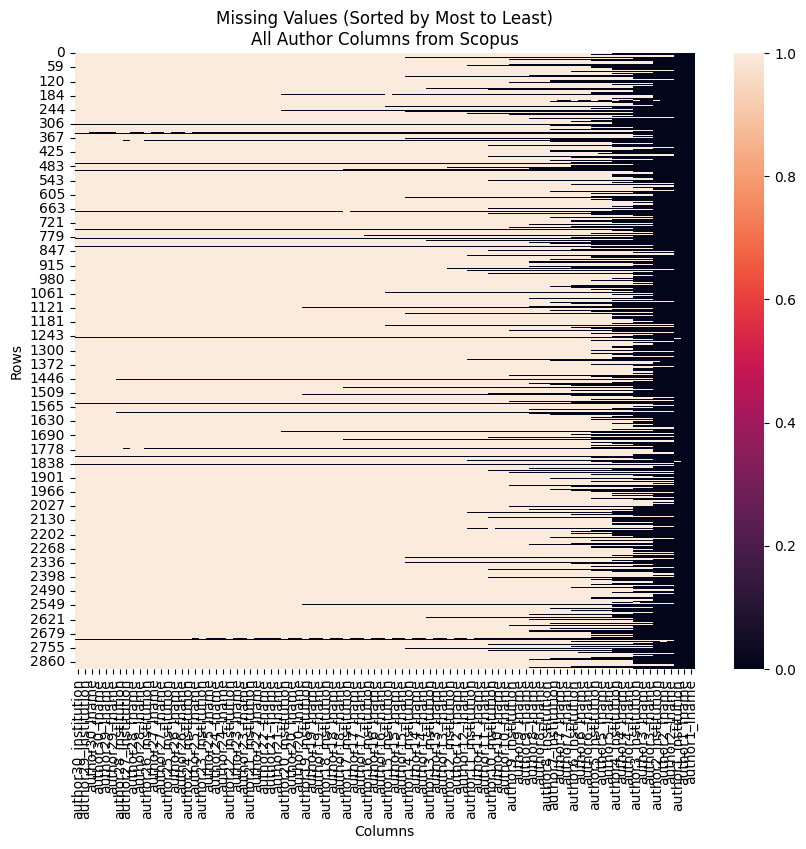

In [54]:
all_author_columns = [column for column in df2.columns if 'author' in column]
df4 = df2[all_author_columns] #this is the scopus spreadsheet with only the author columns

# Count number of missing values per column
missing_vals = df4.isnull().sum()

# Sort values and columns
sorted_cols = missing_vals.sort_values(ascending=False).index

plt.figure(figsize=(10,8))

sns.heatmap(df4[sorted_cols].isnull(),
            xticklabels=sorted_cols)

plt.title('Missing Values (Sorted by Most to Least)\nAll Author Columns from Scopus')
plt.xlabel('Columns')
plt.ylabel('Rows')

In [68]:
#this is because I'm using google colab to do my work - otherwise I could do this easier
#after tossing these all in my google drive folder I put them in my github

drive.mount("/content/drive", force_remount=True)
from google.colab import drive
drive.mount('/content/drive')
df1.to_csv('/content/drive/My Drive/da/df1.csv', index=False)
df2.to_csv('/content/drive/My Drive/da/df2.csv', index=False)
df3.to_csv('/content/drive/My Drive/da/df3.csv', index=False)
df4.to_csv('/content/drive/My Drive/da/df4.csv', index=False)


Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
print(df1.info()) #the Prof provided spreadsheet is a lot smaller and easier to deal with
#print(df2.info()) #the scopus provided spreadsheet has way way too many columns, as discoverd in last checkpoint
not_author_columns = [column for column in df2.columns if 'author' not in column]
df3 = df2[not_author_columns] #this is the scopus spreadsheet without all the author columns

all_author_columns = [column for column in df2.columns if 'author' in column]
df4 = df2[all_author_columns] #this is the scopus spreadsheet with only the author columns

print(df3.info())
print(not_author_columns)

print(df4.info())

print(df4.head(4))

all_institutions_columns = [column for column in df2.columns if 'institution' in column]
df5 = df2[all_institutions_columns] #this is the scopus spreadsheet with only the institutions columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662 entries, 0 to 5661
Data columns (total 36 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   First Name                                                               5662 non-null   object 
 1   Last Name                                                                5662 non-null   object 
 2   Title                                                                    5662 non-null   object 
 3   Journal                                                                  5109 non-null   object 
 4   Date                                                                     2331 non-null   object 
 5   Year                                                                     5353 non-null   float64
 6   Volume                                                                  

In [ ]:
type_counts = df1['Status'].value_counts()
print(type_counts)
df1_published = df1[df1['Status'] == 'Completed/Published']
print(df1_published.info)

print(df1_published['Status'].value_counts())


In [ ]:
print(df1.head(2))
print(df3.head(2))


In [ ]:
print(df1.isna().sum())
print(df3.isna().sum())

titles1 = set(df1['Title'].str.upper().values)
titles2 = set(df3['title'].str.upper().values)
common_titles = titles1.intersection(titles2)
print("*****\nNumber of titles in common")
print(len(common_titles))

dois1 = set(df1['DOI'].values)
dois3 = set(df3['doi'].values)
common_dois = dois1.intersection(dois3)
print("*****\nNumber of dois in common")
print(len(common_dois))

all_dois = dois1.union(dois3)
print("*****Total number of combined dois")
print(len(all_dois))
print(all_dois)


In [ ]:
import requests

API_KEY = '6a2a34c6-7fb4-4bb6-a1e3-5221ba28cabf'

def make_request(url, method='GET'):

  params = {'api_key': API_KEY}

  try:
    response = requests.request(method, url, params=params)
    return response.text
  except requests.exceptions.RequestException as e:
    print(e)
    return None

api_url = "https://api.openaccessbutton.org"

response = make_request(api_url)

print(response)

In [ ]:
# import pandas as pd
# import requests
# import json

# # DataFrame with title and DOI columns
# test_df = pd.DataFrame({
#     'title': ['Ribulose bisphosphate carboxylase: a two-layered, square-shaped molecule of symmetry 422', 'Analysis of several key factors influencing deep learning-based inter-residue contact prediction'],
#     'doi': ['10.12345/abc123', '10.1093/bioinformatics/btz679']
# })

# # API endpoint
# api_url = 'https://api.openaccessbutton.org/permission'

# # Empty lists to store results
# pdfs = []
# open_access = []

# # Iterate through rows
# for index, row in test_df.iterrows():

#     # Construct request parameters
#     params = {
# #        'doi': row['doi'],
#         'title': row['title']
#     }

#     # Make request
#     response = requests.get(api_url, params=params)

#     # Extract PDF URL if available
#     pdf_url = response.json().get('find', None)
#     pdfs.append(pdf_url)

#     # Check if open access
#     open_access.append(response.json().get('oa', False))

# # Add new columns to dataframe
# test_df['pdf'] = pdfs
# test_df['is_oa'] = open_access

# print(test_df)

In [ ]:
# print(all_dois)

# print(type(all_dois))

# chunk_size = 51
# doi_lists = [list(all_dois)[i:i+chunk_size] for i in range(0, len(all_dois), chunk_size)]

# print(doi_lists[0])
# print(', '.join(doi_lists[53]))
# print(type(doi_lists))